# Importando Bibliotecas

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Abrindo arquivo com os dados de acidentes

In [3]:
df = pd.read_csv("D:/FaculdadeCoisas/7 Semestre/Topicos Avancados em Computacao IV/Crash_Data.csv", sep=',', low_memory=False)

df.columns
df = df.drop(columns=df.columns[df.isnull().sum() / len(df) > 0.1])
df = df[df['Year'] > 2012]

# Altera o nome dos dias para portugues
df.loc[df.Dayweek == "Monday"   ,"Dayweek"] = "Segunda-feira"
df.loc[df.Dayweek == "Tuesday"  ,"Dayweek"] = "Terça-feira"
df.loc[df.Dayweek == "Wednesday","Dayweek"] = "Quarta-feira"
df.loc[df.Dayweek == "Thursday" ,"Dayweek"] = "Quinta-feira"
df.loc[df.Dayweek == "Friday"   ,"Dayweek"] = "Sexta-feira"
df.loc[df.Dayweek == "Saturday" ,"Dayweek"] = "Sábado"
df.loc[df.Dayweek == "Sunday"   ,"Dayweek"] = "Domingo"

In [4]:
# Funcao para alterar label X e Y
def spines(ax,yl='Share',xl='Dia semana'):
    x1 = ax.spines['right'].set_visible(False)
    x2 = ax.spines['top'].set_visible(False)
    x3 = ax.spines['left'].set_linewidth(2)
    x4 = ax.spines['bottom'].set_linewidth(2)
    x5 = ax.set_ylabel(yl)
    x6 = ax.set_xlabel(xl)
    return x1, x2, x3, x4, x5, x6

def addValores(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

# Separar o dados em treino e teste
A separação está como padrão, 75% para treino e 25% para teste

In [5]:
X = df[df.columns]

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X)

# Analisa numero de acidentes ao decorrer dos anos

In [6]:
data = pd.read_csv("D:/FaculdadeCoisas/7 Semestre/Topicos Avancados em Computacao IV/Crash_Data.csv", low_memory=False)
data = pd.DataFrame(data)
data = data[data['Year'] > 2011]

data['X'] = np.arange(data.shape[0])

fig = px.scatter(x=data['Year'], y= data['X'],trendline="ols", title='Números de acidentes',labels = 'Calendário por ano',)

fig.show()

# Dias com mais acidentes

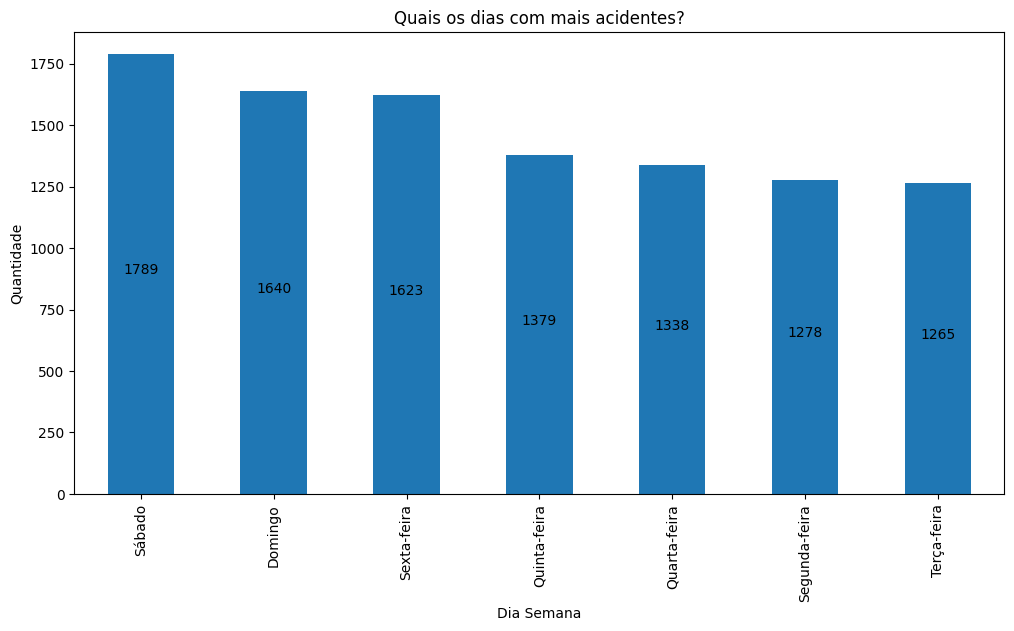

In [6]:
# Cria o grafico
dia        = df["Dayweek"]
quantidade = dia.value_counts()
quantidade.plot(kind='bar',figsize=(12,6))

# Coloca os valores no grafico
dia_semana         = df['Dayweek'].value_counts().sort_index(ascending=False).index.tolist()
quantidade_por_dia = quantidade.value_counts().sort_index(ascending=False).index.tolist()

addValores(dia_semana,quantidade_por_dia)

# Altera os labels X, Y e o titulo
plt.xlabel('Dia Semana')
plt.ylabel('Quantidade')
plt.title('Quais os dias com mais acidentes?')
plt.show()

# Análise de Número de dias que ocorreram acidentes
Foi realizado a análise do número de acidentes por ano do dataset do período de 2013 à 2021

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
df.groupby('Dayweek')['Crash ID'].count().plot.bar()

addValores(dia_semana, df.groupby('Dayweek')['Crash ID'].count().iloc) 

# Altera os labels X, Y e o titulo
plt.xlabel('Dia Semana')
plt.ylabel('Quantidade')
plt.title('Quais os dias com mais acidentes?')
plt.show()

# Treino do número de acidentes por ano

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
X_train.groupby('Dayweek')['Crash ID'].count().plot.bar()

# Adiciona valores no grafico
addValores(dia_semana, X_train.groupby('Dayweek')['Crash ID'].count().iloc) 

# Altera os labels X, Y e o titulo
plt.xlabel('Dia Semana')
plt.ylabel('Quantidade')
plt.title('Quais os dias com mais acidentes?')
plt.show()

# Teste do número de acidentes por ano

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
X_test.groupby('Dayweek')['Crash ID'].count().plot.bar()

# Adiciona valores no grafico
addValores(dia_semana, X_test.groupby('Dayweek')['Crash ID'].count().iloc) 

# Altera os labels X, Y e o titulo
plt.xlabel('Dia Semana')
plt.ylabel('Quantidade')
plt.title('Quais os dias com mais acidentes?')
plt.show()

In [ ]:
df['Age Group'].value_counts()

In [ ]:
X_train['Age Group'].value_counts()

In [ ]:
X_test['Age Group'].value_counts()

# Análise dos dados de faixa etária por dia da semana
Realizado a análise dos dados de faixa etária do dataset do período de 2013 à 2021

In [ ]:
age_groups = df['Age Group'].value_counts().sort_index().index.tolist()
fig, ax = plt.subplots(figsize=(24,18))
fig.suptitle('Proporção de acidentes por dia para cada faixa etária', y=0.93)
n = 0 

for group in age_groups:

    n+=1
    for_plot = df[df['Age Group'] == group].groupby('Dayweek')['Crash ID'].count() / df.groupby('Dayweek')['Crash ID'].count()
    ax = plt.subplot(320+n)
    
    plt.bar(for_plot.index, for_plot.values)
    plt.title(group)
    plt.ylim(0.02,0.35)
    spines(ax,xl="Dia Semana")
    
plt.show()

# Treino da Proporção de acidentes por dia para cada faixa etária
Aplicamos o treino para as amostras selecionadas

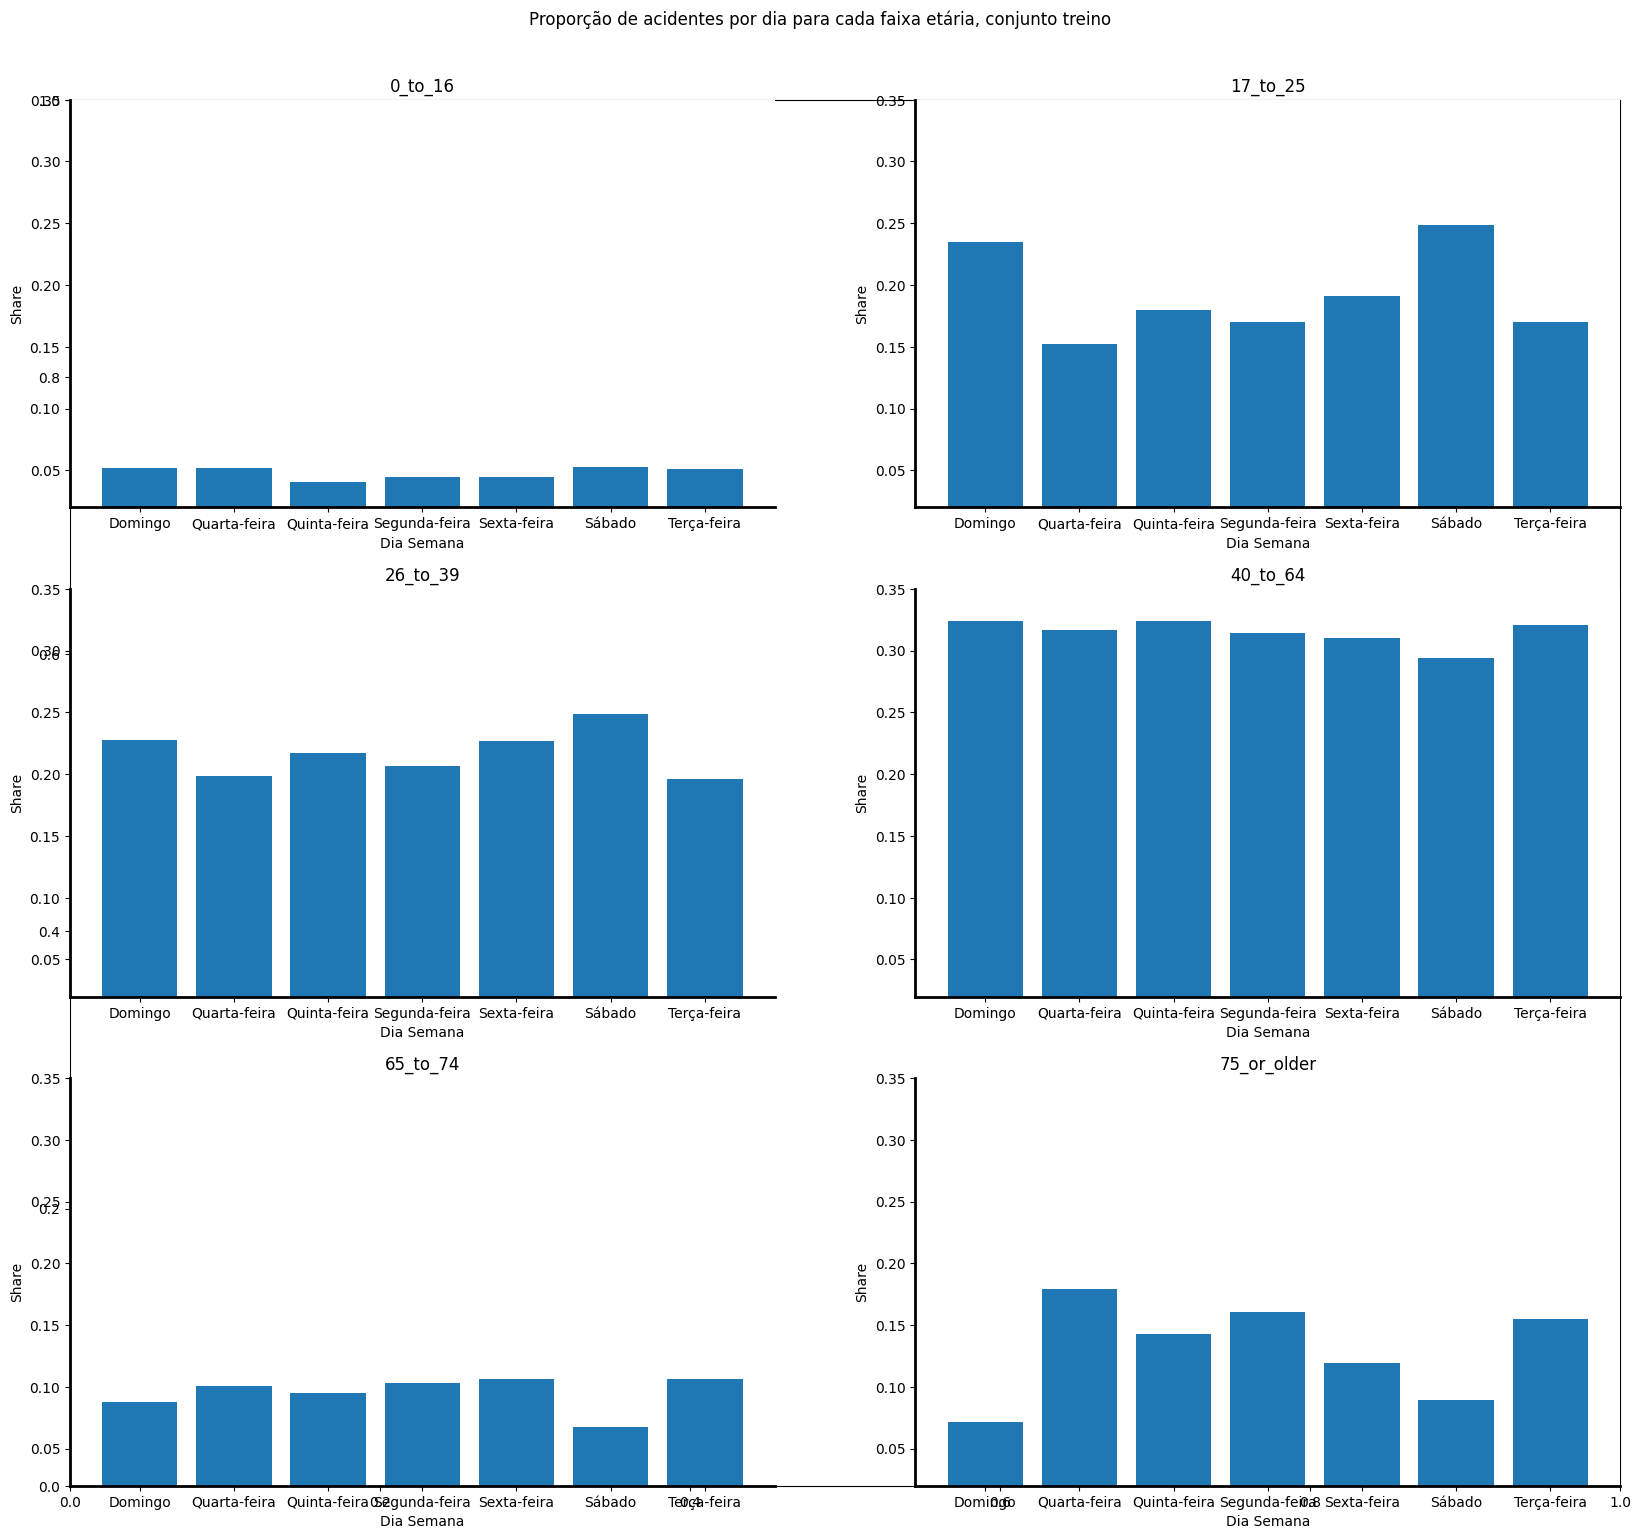

In [9]:
age_groups = X_train['Age Group'].value_counts().sort_index().index.tolist()

fig, ax = plt.subplots(figsize=(20,18))
fig.suptitle('Proporção de acidentes por dia para cada faixa etária, conjunto treino', y=0.93)
n = 0 

for group in age_groups:

    n = n + 1
    for_plot = X_train[X_train['Age Group'] == group].groupby('Dayweek')['Crash ID'].count() / X_train.groupby('Dayweek')['Crash ID'].count()
    ax = plt.subplot(320+n)

    plt.bar(for_plot.index, for_plot.values)
    plt.title(group)
    plt.ylim(0.02,0.35)
    spines(ax,xl="Dia Semana")
    
plt.show()

# Teste da Proporção de acidentes por dia para cada faixa etária
Aplicamos o teste para as amostras selecionadas

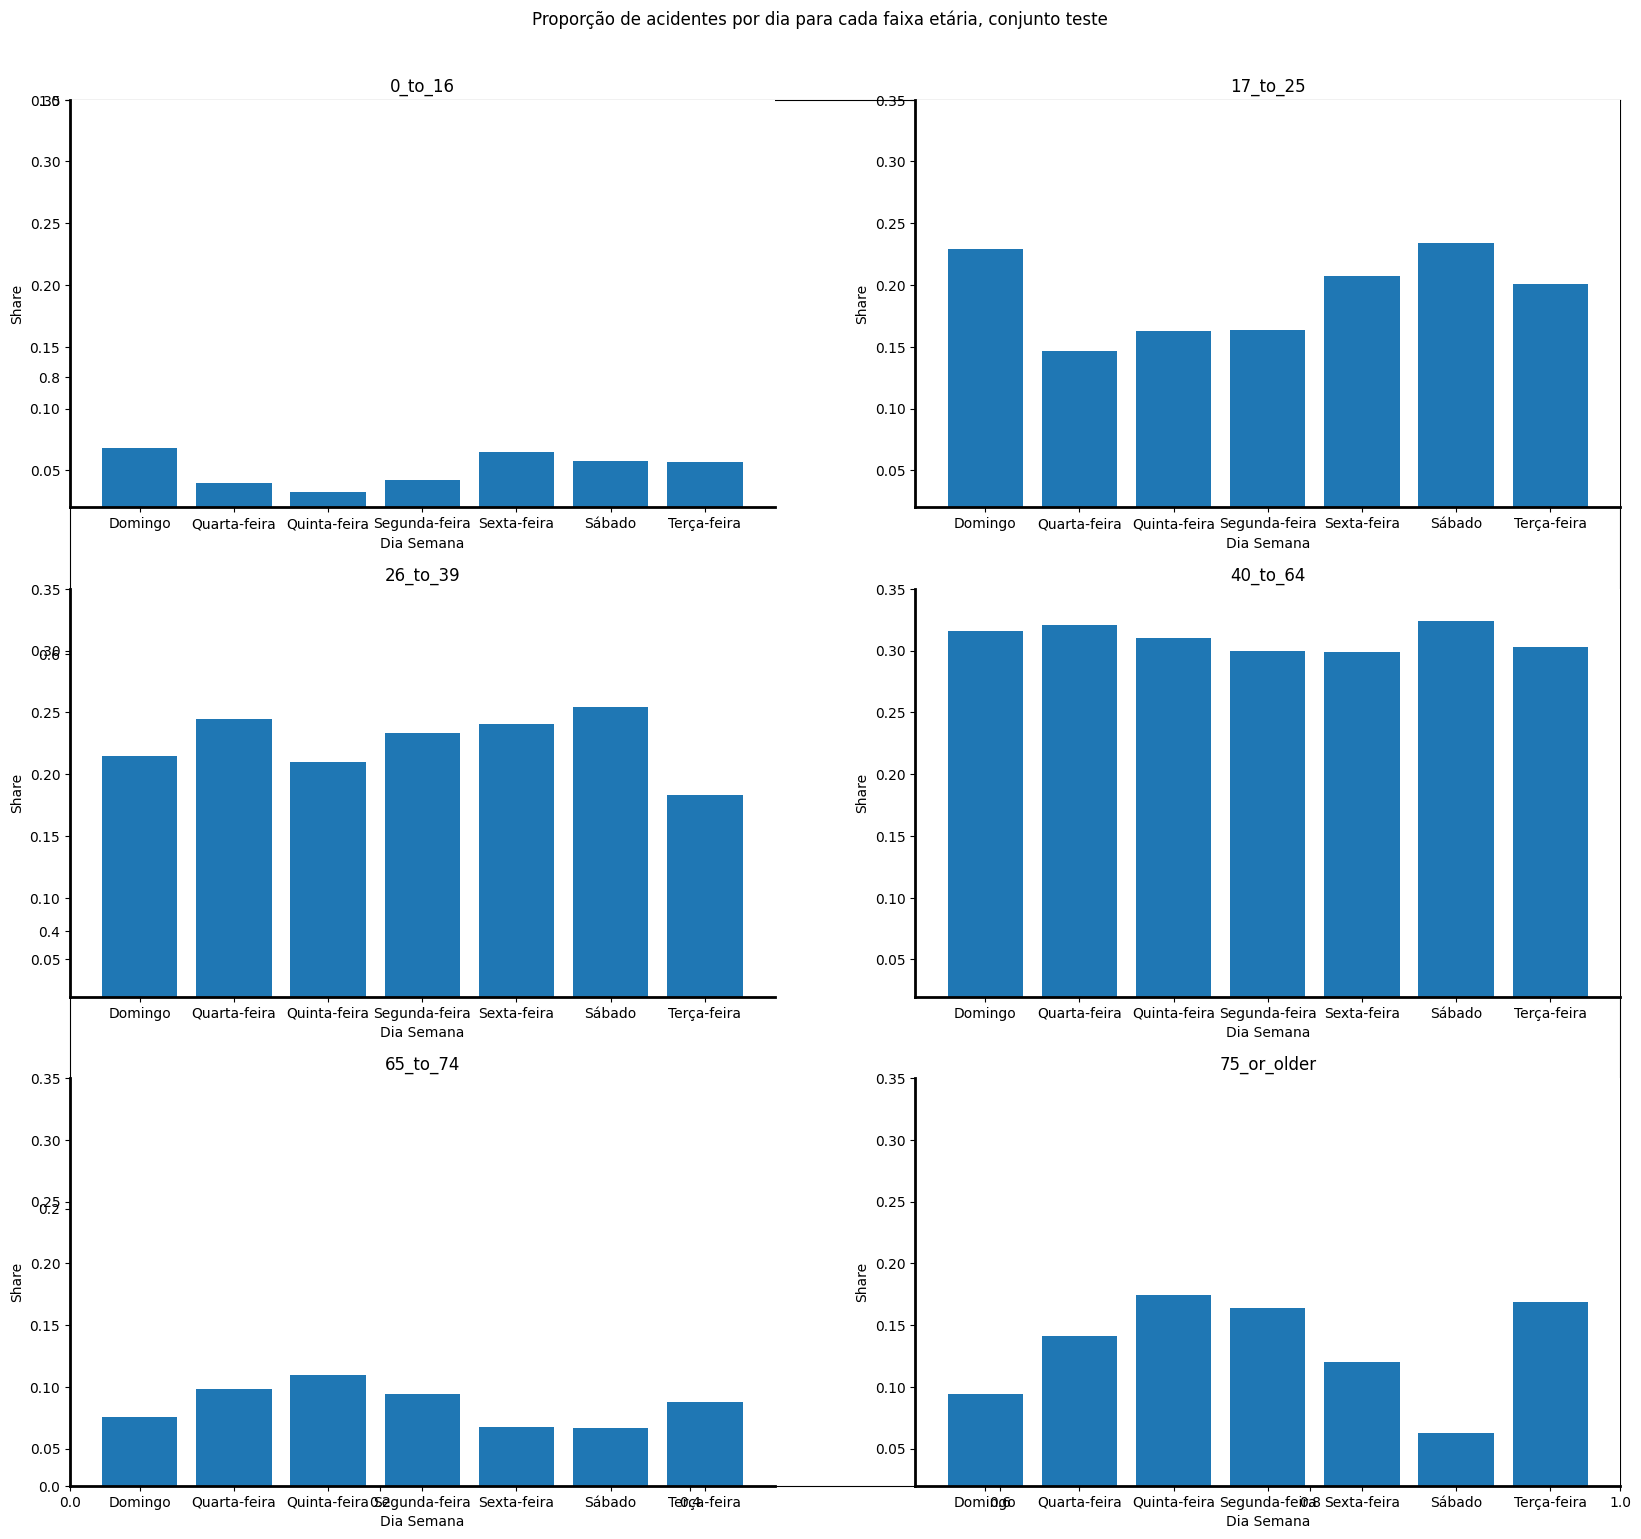

In [8]:
age_groups = X_test['Age Group'].value_counts().sort_index().index.tolist()

fig, ax = plt.subplots(figsize=(20,18))
fig.suptitle('Proporção de acidentes por dia para cada faixa etária, conjunto teste', y=0.93)
n = 0 

for group in age_groups:

    n = n + 1
    for_plot = X_test[X_test['Age Group'] == group].groupby('Dayweek')['Crash ID'].count() / X_test.groupby('Dayweek')['Crash ID'].count()
    ax = plt.subplot(320+n)
    
    plt.bar(for_plot.index, for_plot.values)
    plt.title(group)
    plt.ylim(0.02,0.35)
    spines(ax,xl="Dia Semana")
    
plt.show()

<BarContainer object of 6 artists>

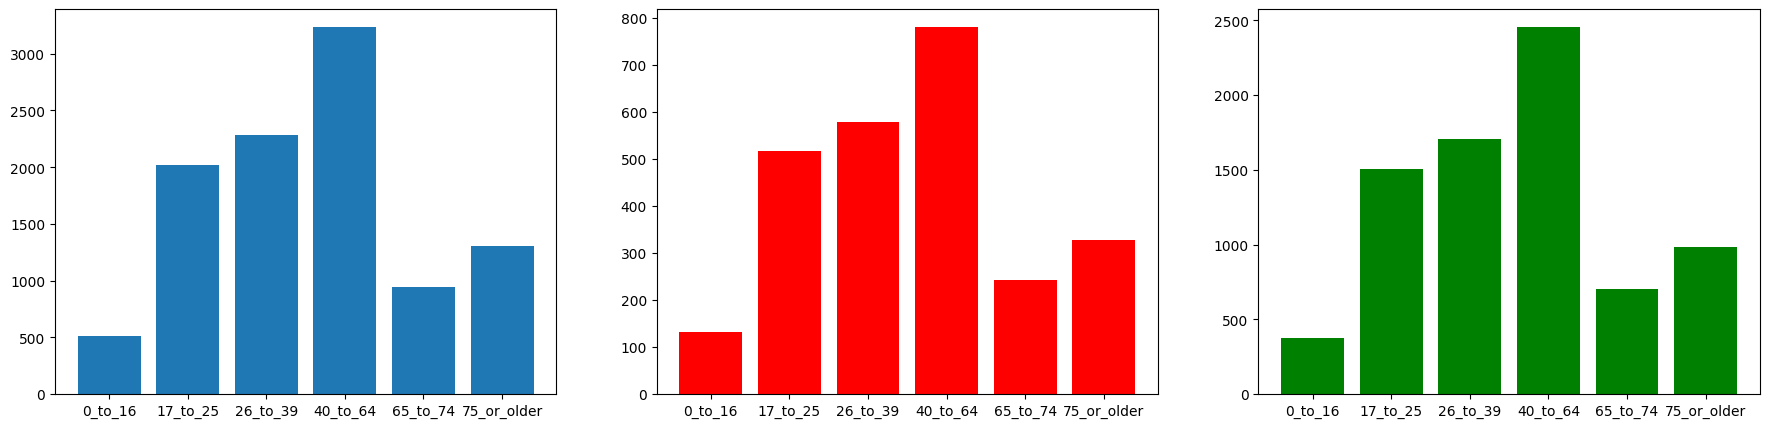

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(22,5))

fonte  = df.groupby("Age Group")["Crash ID"].count()
treino = X_train.groupby("Age Group")["Crash ID"].count()
test   = X_test.groupby("Age Group")["Crash ID"].count()

axs[0].bar(fonte.index, fonte)
axs[1].bar(test.index, test, color="red")
axs[2].bar(treino.index, treino, color="green")

# Análise do Percentual de acidentes noite/dia

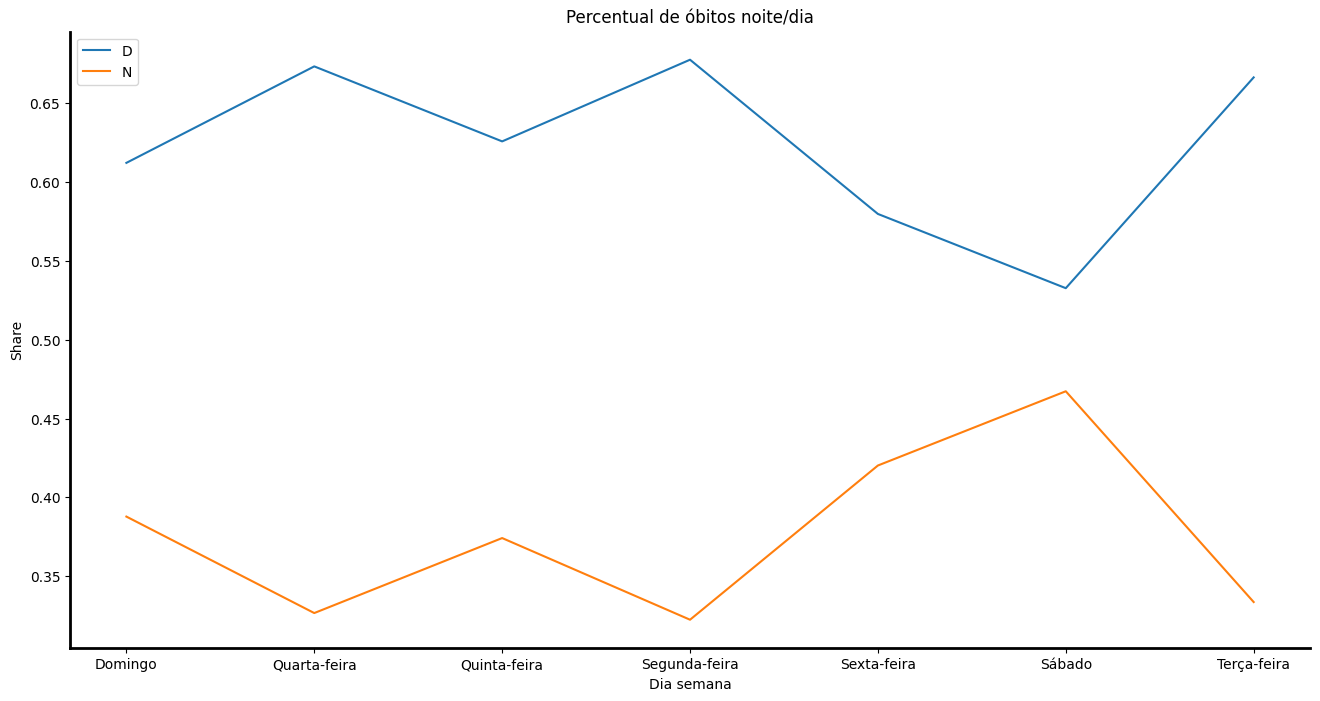

In [7]:
time_groups = df['Time of day'].value_counts().sort_index().index.tolist()

fig, ax = plt.subplots(figsize=(16,8))
n = 0 

for group in time_groups:

    n = n + 1
    for_plot = df[df['Time of day'] == group].groupby('Dayweek')['Crash ID'].count() / df.groupby('Dayweek')['Crash ID'].count()
    plt.plot(for_plot.index, for_plot.values, label=group)
    plt.title('Percentual de óbitos noite/dia')

    plt.legend('DN')
    spines(ax)
    
plt.show()